In [29]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_processed.csv to heart_disease_processed.csv


In [5]:
import pandas as pd
df = pd.read_csv('heart_disease_processed.csv')

# Display basic info to understand structure
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  int64  
 1   Sex                        445132 non-null  int64  
 2   GeneralHealth              445132 non-null  int64  
 3   PhysicalHealthDays         445132 non-null  int64  
 4   MentalHealthDays           445132 non-null  int64  
 5   LastCheckupTime            445132 non-null  int64  
 6   PhysicalActivities         445132 non-null  int64  
 7   SleepHours                 445132 non-null  int64  
 8   RemovedTeeth               445132 non-null  int64  
 9   HadHeartAttack             445132 non-null  int64  
 10  HadAngina                  445132 non-null  int64  
 11  HadStroke                  445132 non-null  int64  
 12  HadAsthma                  445132 non-null  int64  
 13  HadSkinCancer              44

(None,
    State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
 0      0    0              4                   0                 0   
 1      0    0              0                   0                 0   
 2      0    0              4                   2                 3   
 3      0    0              0                   0                 0   
 4      0    0              1                   2                 0   
 
    LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
 0                3                   0           8             3   
 1                3                   0           6             3   
 2                3                   1           5             3   
 3                3                   1           7             3   
 4                3                   1           9             3   
 
    HadHeartAttack  ...  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
 0               0  ...              80.74  27.44                0 

In [7]:
# List of numerical columns to normalize
numerical_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                  'HeightInMeters', 'WeightInKilograms', 'BMI']

# Normalize numerical features
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

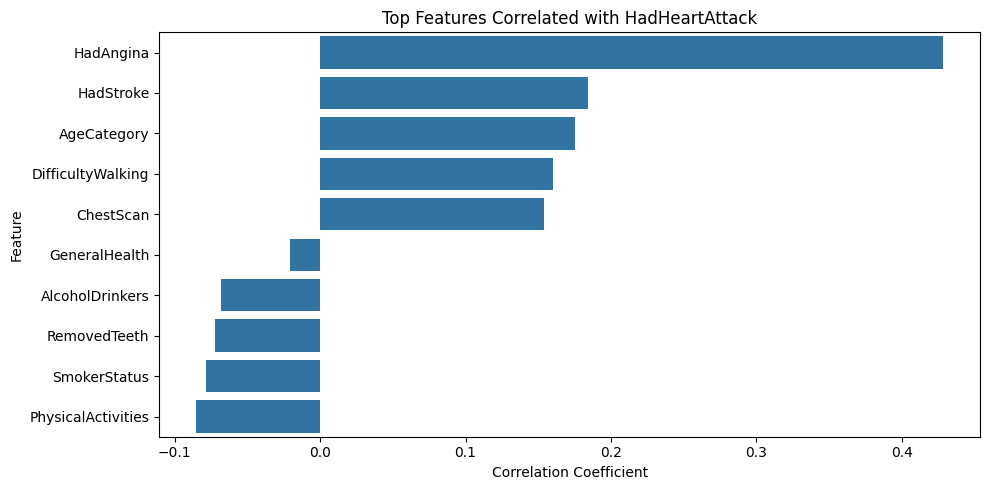

In [12]:
# Compute correlation with target
correlation = df.corr(numeric_only=True)['HadHeartAttack'].sort_values(ascending=False)

# Combine top positive and negative correlations
top_features = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top Features Correlated with HadHeartAttack")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

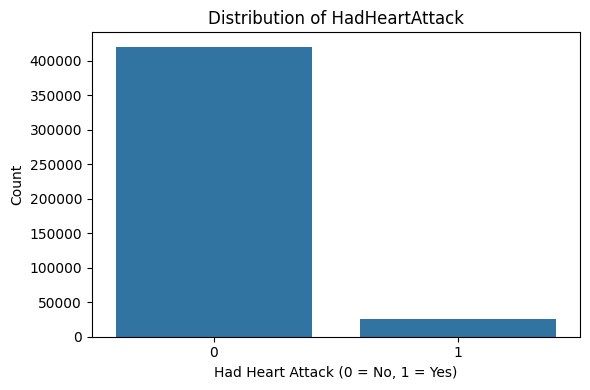

In [13]:
# Plot count of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='HadHeartAttack', data=df)
plt.title("Distribution of HadHeartAttack")
plt.xlabel("Had Heart Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [8]:
# Split into features and target
X = df.drop(columns=['HadHeartAttack'])
y = df['HadHeartAttack']

# Display shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (445132, 40)
Target shape: (445132,)


In [16]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm split sizes
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (356105, 40)
Test set size: (89027, 40)


In [17]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))

Logistic Regression Accuracy: 0.944792029384344
Random Forest Accuracy: 0.9455109124198277
Neural Network Accuracy: 0.943904658137419


In [19]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {model.__class__.__name__}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
    print("-" * 40)

# Evaluate all models
evaluate_model(logreg, X_test, y_test)
evaluate_model(rf, X_test, y_test)
evaluate_model(mlp, X_test, y_test)

Model: LogisticRegression
Accuracy : 0.944792029384344
Precision: 0.5554450522128295
Recall   : 0.21739976644608797
F1-Score : 0.31249125751853407
ROC-AUC  : 0.8786008867182695
----------------------------------------
Model: RandomForestClassifier
Accuracy : 0.9455109124198277
Precision: 0.5994455994455995
Recall   : 0.1683534449202024
F1-Score : 0.2628779820695943
ROC-AUC  : 0.869437373222445
----------------------------------------
Model: MLPClassifier
Accuracy : 0.943904658137419
Precision: 0.5319432120674357
Recall   : 0.2333592837680031
F1-Score : 0.3244047619047619
ROC-AUC  : 0.8617738956343269
----------------------------------------


In [23]:
# Show original class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show new class distribution
print("After SMOTE class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 420024, 1: 25108})
After SMOTE class distribution: Counter({0: 420024, 1: 420024})


** Applying SMOTE**

In [24]:
# Normalize numerical features
numerical_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                  'HeightInMeters', 'WeightInKilograms', 'BMI']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Split into features and target
X = df.drop(columns=['HadHeartAttack'])
y = df['HadHeartAttack']

# Show original class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Original class distribution: Counter({0: 420024, 1: 25108})


In [25]:
# Show new class distribution
print("After SMOTE class distribution:", Counter(y_resampled))

# Train-test split (on original data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)


After SMOTE class distribution: Counter({0: 420024, 1: 420024})


In [26]:
# Retrain models on balanced data
logreg.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
mlp.fit(X_resampled, y_resampled)

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {model.__class__.__name__}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
    print("-" * 40)

In [27]:
# Evaluate models on original test set
evaluate_model(logreg, X_test, y_test)
evaluate_model(rf, X_test, y_test)
evaluate_model(mlp, X_test, y_test)

Model: LogisticRegression
Accuracy : 0.7958147528277938
Precision: 0.15888877262739354
Recall   : 0.5910860256909303
F1-Score : 0.2504535708395184
ROC-AUC  : 0.7741857751833467
----------------------------------------
Model: RandomForestClassifier
Accuracy : 0.9999887674525706
Precision: 0.9998054096127651
Recall   : 1.0
F1-Score : 0.9999026953391067
ROC-AUC  : 0.9999991508547823
----------------------------------------
Model: MLPClassifier
Accuracy : 0.8639289204398666
Precision: 0.21572942135289325
Recall   : 0.5151810042818217
F1-Score : 0.30411305147058826
ROC-AUC  : 0.8291858691229367
----------------------------------------


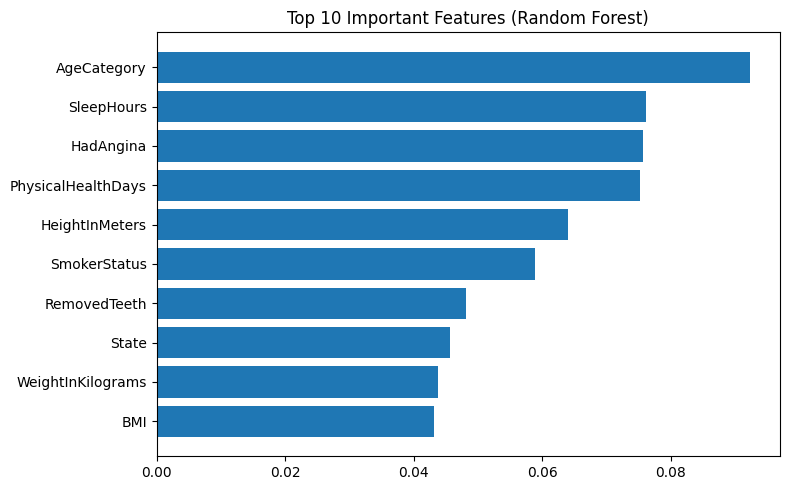

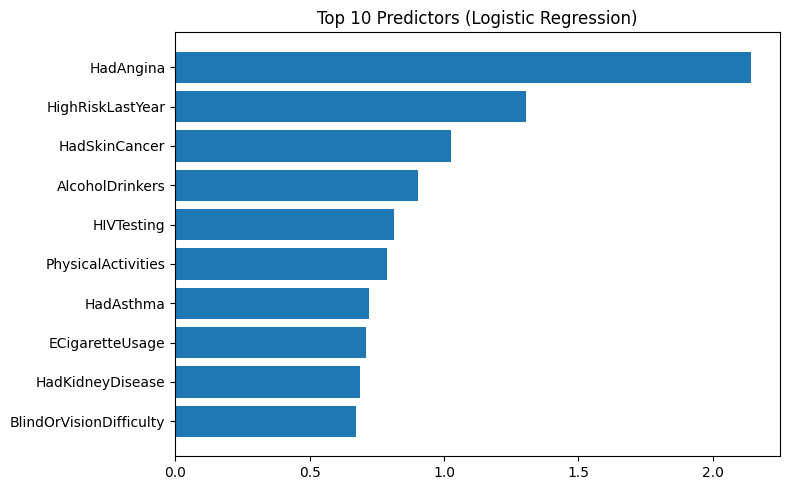

In [28]:
# Feature names
feature_names = X.columns

# Random Forest Feature Importance
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[-10:]  # Top 10

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices_rf)), importances_rf[indices_rf])
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()

# Logistic Regression Coefficients (absolute)
coef_logreg = np.abs(logreg.coef_[0])
indices_logreg = np.argsort(coef_logreg)[-10:]  # Top 10

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices_logreg)), coef_logreg[indices_logreg])
plt.yticks(range(len(indices_logreg)), [feature_names[i] for i in indices_logreg])
plt.title("Top 10 Predictors (Logistic Regression)")
plt.tight_layout()
plt.show()

In [30]:


# Save models
joblib.dump(logreg, 'logistic_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(mlp, 'neural_network_model.pkl')

# To load later
# logreg = joblib.load('logistic_model.pkl')
# rf = joblib.load('random_forest_model.pkl')
# mlp = joblib.load('neural_network_model.pkl')

['neural_network_model.pkl']